In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-12-31 19:38:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 2404:f340:10:1802::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  12.8MB/s    in 13s     

2020-12-31 19:38:58 (11.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-12-31 19:38:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 2404:f340:10:1800::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187

In [2]:
import os
import zipfile

# first zip file
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

# second zip file
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# train-horse
train_horse_dir = os.path.join('/tmp/hourse-or-human/horses')
# train-human
train_human_dir = os.path.join('.tmp.hourse-or-human/humans')
# validation-horse
validation_horse_dir = os.path.join('/tmp/validation-hourse-or-human/horses')
# validation-human
validation_horse_dir = os.path.join('/tmp/validation-hourse-or-human/humans')

In [6]:
# build a model
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [17]:
# image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 4s 551ms/step - loss: 0.6918 - accuracy: 0.4894 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 5s 627ms/step - loss: 0.6875 - accuracy: 0.5217 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 5s 617ms/step - loss: 0.6867 - accuracy: 0.5228 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 5s 628ms/step - loss: 0.6881 - accuracy: 0.5006 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 6s 720ms/step - loss: 0.6836 - accuracy: 0.5293 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 5s 627ms/step - loss: 0.6827 - accuracy: 0.5250 - val_loss: 0.6802 - val_accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 6s 718ms/step - loss: 0.6781 - accuracy: 0.5373 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 8/100
8

Epoch 59/100
8/8 [==============================] - 5s 618ms/step - loss: 0.3457 - accuracy: 0.8398 - val_loss: 0.1703 - val_accuracy: 0.9531
Epoch 60/100
8/8 [==============================] - 5s 620ms/step - loss: 0.4882 - accuracy: 0.7976 - val_loss: 1.0513 - val_accuracy: 0.6602
Epoch 61/100
8/8 [==============================] - 6s 713ms/step - loss: 0.3420 - accuracy: 0.8487 - val_loss: 0.9601 - val_accuracy: 0.6914
Epoch 62/100
8/8 [==============================] - 5s 620ms/step - loss: 0.3094 - accuracy: 0.8665 - val_loss: 1.4338 - val_accuracy: 0.5977
Epoch 63/100
8/8 [==============================] - 5s 624ms/step - loss: 0.3370 - accuracy: 0.8498 - val_loss: 1.2694 - val_accuracy: 0.6406
Epoch 64/100
8/8 [==============================] - 5s 623ms/step - loss: 0.3571 - accuracy: 0.8320 - val_loss: 1.2009 - val_accuracy: 0.6562
Epoch 65/100
8/8 [==============================] - 5s 623ms/step - loss: 0.3137 - accuracy: 0.8521 - val_loss: 0.9570 - val_accuracy: 0.7070
Epoch 

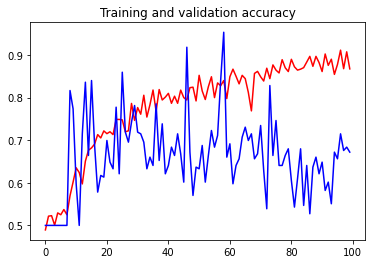

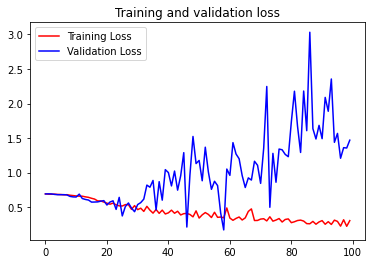

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import os, signal

os.kill(os.getpid(),signal.SIGKILL)